In [ ]:
import os
import shutil # name space

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
# Original Data Path
original_dataset_dir = './datasets/train'

# Small Dataset Path 이미지들 3등분하기 위해서 (훈련용, 검증용, 테스트용)
base_dir = './datasets/cats_and_dogs_small'

# 폴더가 없을 때 새로 만들기
if os.path.exists(base_dir):
    shutil.rmtree(base_dir) # dir가 있다면 지우기
os.mkdir(base_dir)

In [ ]:
# Train, Validation, Test data dir만들기
train_dir = os.path.join(base_dir, 'train') # os에서 경로 받아서 합치기 base_dir/train
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [ ]:
# file copy ex)학습용 1000개 검증용 500개 테스트용 500개 나누기

# fnames = []
# for i in range(1000):
#     filename = 'cat.{}.jpg'.format(i)
#     fnames.append(filename)

# cat train data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) # 원본경로
    dst = os.path.join(train_cats_dir, fname) # 카피경로
    shutil.copyfile(src, dst) # 카피
    
# dog train data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) # 원본경로
    dst = os.path.join(train_dogs_dir, fname) # 카피경로
    shutil.copyfile(src, dst) # 카피

print('------------------- Test dataset Copy completed')

In [ ]:
# cat validation data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) # 원본경로
    dst = os.path.join(validation_cats_dir, fname) # 카피경로
    shutil.copyfile(src, dst) # 카피
    
# dog validaion data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) # 원본경로
    dst = os.path.join(validation_dogs_dir, fname) # 카피경로
    shutil.copyfile(src, dst) # 카피
    
print('------------------ Validation dataset Copy completed')

------------------ Validation dataset Copy completed


In [ ]:
# cat test data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) # 원본경로
    dst = os.path.join(test_cats_dir, fname) # 카피경로
    shutil.copyfile(src, dst) # 카피
    
# dog test data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) # 원본경로
    dst = os.path.join(test_dogs_dir, fname) # 카피경로
    shutil.copyfile(src, dst) # 카피
    
print('------------------ Test dataset Copy completed')

------------------ Test dataset Copy completed


In [ ]:
print('Train cat images: ', len(os.listdir(train_cats_dir))) # 경로 안에 카피된 파일의 갯수
print('Train dog images: ', len(os.listdir(train_dogs_dir)))
print('Validation cat images: ', len(os.listdir(validation_cats_dir)))
print('Validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('Test cat images: ', len(os.listdir(test_cats_dir)))
print('Test dog images: ', len(os.listdir(test_dogs_dir)))

Train cat images:  1000
Train dog images:  1000
Validation cat images:  500
Validation dog images:  500
Test cat images:  500
Test dog images:  500


In [ ]:
# Build network

from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # cat or dog 이진분류
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
# Data Preprocessing

# Image scaling 픽셀 동일하게 맞추기
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) #소수점 0~1사이 생성 위해
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                        train_dir,
                        target_size=(150,150),
                        batch_size=20,
                        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
                        test_dir,
                        target_size=(150,150),
                        batch_size=20,
                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:   # 리스트 type
    print('Batch Data Size: ', data_batch.shape)
    print('Batch Label Size: ', labels_batch.shape)
    break

Batch Data Size:  (20, 150, 150, 3)
Batch Label Size:  (20,)


In [ ]:
len(train_generator)

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100, # 한번에 100개 단위로 돌리기
    epochs=30, # 총 반복 횟수
    validation_data=validation_generator,
    validation_steps=50 # 50개 단위로 검증
)

Epoch 1/30
100/100 [==============================] - 89s 890ms/step - loss: 0.8162 - accuracy: 0.5230 - val_loss: 0.6916 - val_accuracy: 0.5040
Epoch 2/30
100/100 [==============================] - 83s 827ms/step - loss: 0.6938 - accuracy: 0.5590 - val_loss: 0.6817 - val_accuracy: 0.5310
Epoch 3/30
100/100 [==============================] - 83s 828ms/step - loss: 0.6736 - accuracy: 0.6225 - val_loss: 0.6921 - val_accuracy: 0.6190
Epoch 4/30
100/100 [==============================] - 83s 830ms/step - loss: 0.6198 - accuracy: 0.6765 - val_loss: 0.7080 - val_accuracy: 0.6530
Epoch 5/30
100/100 [==============================] - 83s 828ms/step - loss: 0.5682 - accuracy: 0.7080 - val_loss: 0.6036 - val_accuracy: 0.6790
Epoch 6/30
100/100 [==============================] - 84s 836ms/step - loss: 0.5284 - accuracy: 0.7470 - val_loss: 0.9863 - val_accuracy: 0.6050
Epoch 7/30
100/100 [==============================] - 84s 839ms/step - loss: 0.4695 - accuracy: 0.7765 - val_loss: 0.8394 - val_ac

In [ ]:
model.save('cats_and_dogs_small_1.0.h5')

Text(0.5, 1.0, 'Training and validation loss')

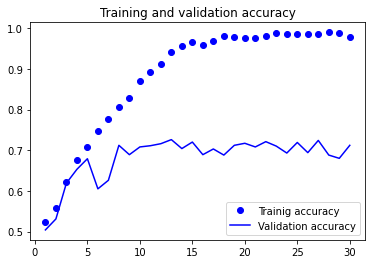

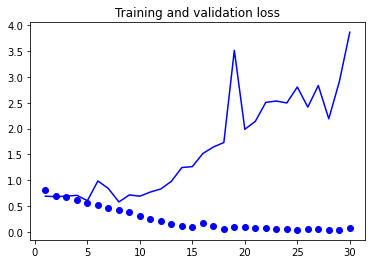

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Trainig accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Trainig loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')

In [ ]:
# 새로운 generator 만들기

# image 증식시키기
datagen = ImageDataGenerator(
        rotation_range=40,       # 40도 돌리기
        width_shift_range=0.2,   # 좌,우로 20% 이내로 옮겨보기
        height_shift_range=0.2,  # 상,하
        shear_range=0.2,  # 이미지 기울기
        zoom_range=0.2,   # 확대, 축소 범위
        horizontal_flip=True,
        fill_mode='nearest'
)

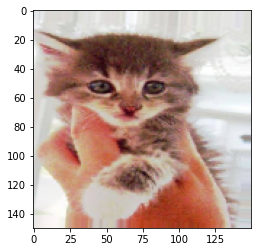

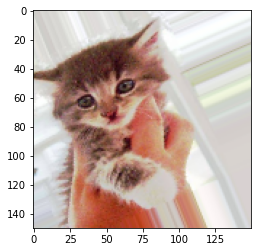

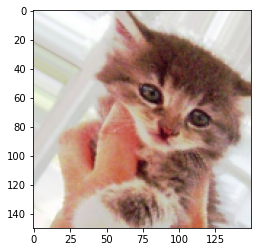

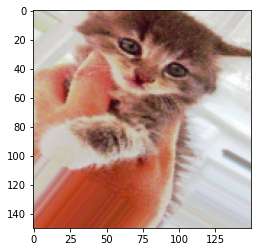

In [ ]:
from tensorflow.keras.preprocessing import image


# 정렬
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img) # 이미지 x 좌표
x = x.reshape((1,) + x.shape)

i = 0 # 시작값
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # 타깃 디렉터리        
    train_dir,
    # 모든 이미지를 150 × 150 크기로 바꿉니다
    target_size=(150, 150),        
    batch_size=32,        
    # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다 
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
 63/100 [=================>............] - 85s 1s/step - loss: 0.6628 - accuracy: 0.6560 - val_loss: 0.6134 - val_accuracy: 0.6680
